In [1]:
import tensorflow as tf
physicaldevice = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(physicaldevice[0],True)

Num GPUs Available:  1


In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read Data from CSV files

In [89]:
datas = pd.read_csv("C:\\Users\\abdul\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")
datas.set_index("Id",inplace=True)

# EDA

In [90]:
from jcopml.plot import plot_missing_value

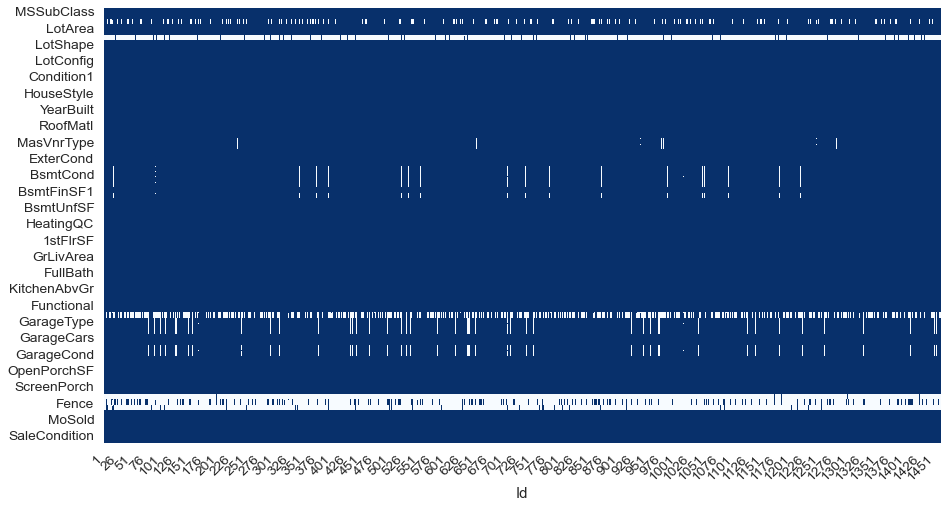

In [91]:
# clean null value
# if null >= 0.4 remove columns
plot_missing_value(datas)

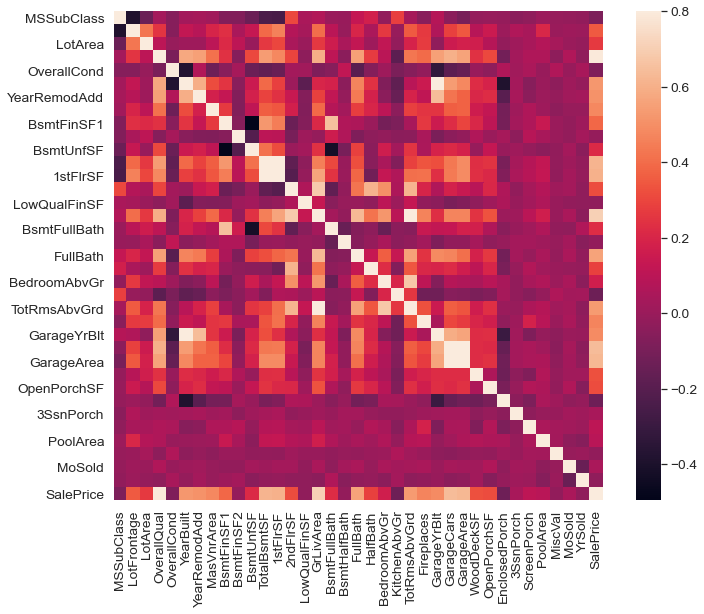

In [92]:
#correlation matrix
corrmat = datas.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

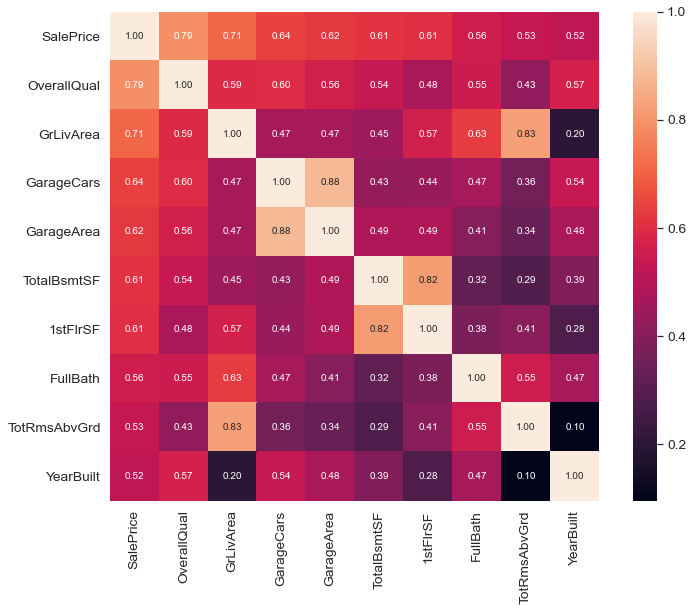

In [93]:
#choose the best variable for train
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(datas[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [94]:
dataset=datas[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]

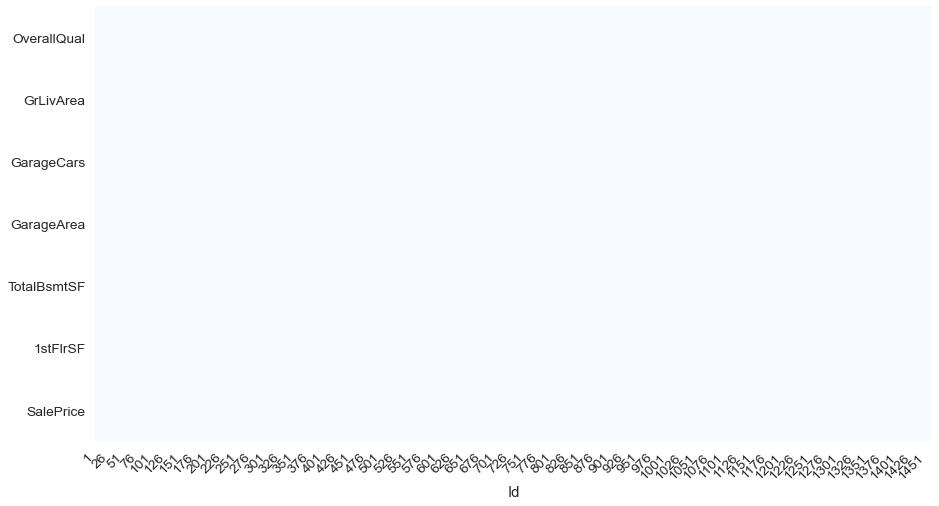

In [95]:
# Looking for null value
plot_missing_value(dataset)

In [96]:
# if the unique count <= 10 it wil be one hot encoding
for col in dataset.columns:
    if len(dataset[col].unique()) <= 10 :
        dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)

In [97]:
for col in dataset.columns:
    if len(dataset[col].unique()) > 10 :
        print(col)


GrLivArea
GarageArea
TotalBsmtSF
1stFlrSF
SalePrice


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

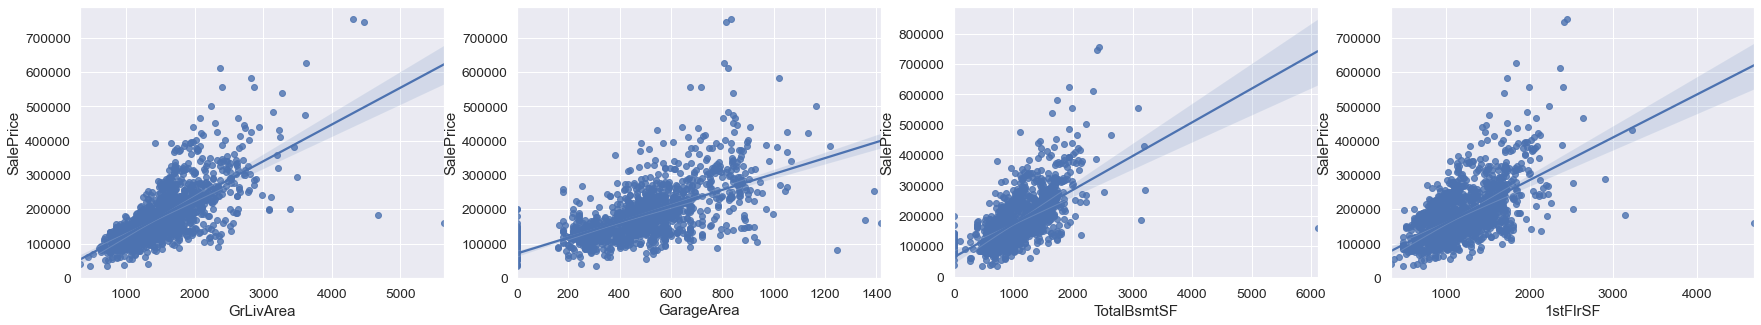

In [98]:
# see the correlation of GrLivArea and SalePrice

fig, axs = plt.subplots(ncols=4,figsize=(30, 5))
sns.regplot(x="GrLivArea", y="SalePrice", data=dataset,ax=axs[0])
sns.regplot(x="GarageArea", y="SalePrice", data=dataset,ax=axs[1])
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dataset,ax=axs[2])
sns.regplot(x="1stFlrSF", y="SalePrice", data=dataset,ax=axs[3])

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

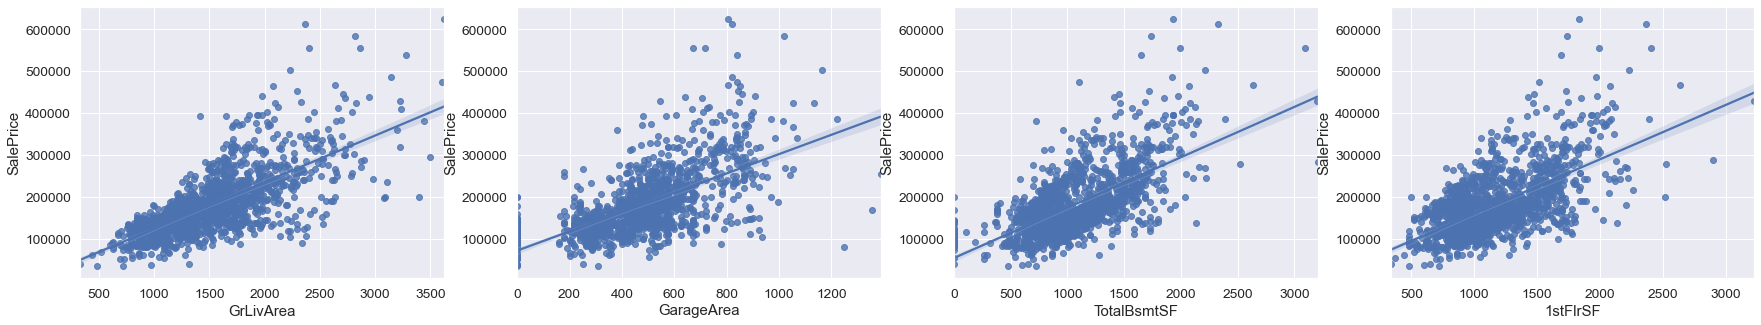

In [99]:
# because GrLivArea has datas that make graphic dirty so i decide to remove GrLivArea > 4000
dataset = dataset[dataset["GrLivArea"] < 4000]
fig, axs = plt.subplots(ncols=4,figsize=(30, 5))
sns.regplot(x="GrLivArea", y="SalePrice", data=dataset,ax=axs[0])
sns.regplot(x="GarageArea", y="SalePrice", data=dataset,ax=axs[1])
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dataset,ax=axs[2])
sns.regplot(x="1stFlrSF", y="SalePrice", data=dataset,ax=axs[3])

In [100]:
train_stats = dataset.describe()
train_stats.pop("SalePrice")
train_stats

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,...,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,6.088599,1506.502060,1.764423,471.568681,1050.658654,1157.108516,0.001374,0.002060,0.013736,0.079670,...,0.256868,0.219093,0.115385,0.029533,0.009615,0.055632,0.253434,0.565247,0.122253,0.003434
std,1.369669,496.815378,0.746215,211.986421,412.155715,369.307331,0.037050,0.045361,0.116434,0.270875,...,0.437056,0.413774,0.319595,0.169353,0.097619,0.229288,0.435127,0.495895,0.327690,0.058520
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1128.000000,1.000000,329.500000,795.000000,882.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1458.500000,2.000000,478.500000,990.500000,1086.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.000000,1775.250000,2.000000,576.000000,1293.750000,1389.250000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,10.000000,3627.000000,4.000000,1390.000000,3206.000000,3228.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Model

In [101]:
# split cleaned data into train and test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# split data from data and labels
train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')

In [102]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

In [103]:
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:38779850752.0000,  mae:180484.5781,  mse:38779850752.0000,  val_loss:36161896448.0000,  val_mae:176231.2344,  val_mse:36161896448.0000,  
....................................................................................................
Epoch: 100, loss:1758383360.0000,  mae:29472.1348,  mse:1758383360.0000,  val_loss:1740376320.0000,  val_mae:28301.5703,  val_mse:1740376320.0000,  
....................................................................................................
Epoch: 200, loss:1705089024.0000,  mae:29111.7852,  mse:1705089024.0000,  val_loss:1673634048.0000,  val_mae:26153.6797,  val_mse:1673634048.0000,  
....................................................................................................
Epoch: 300, loss:1671859328.0000,  mae:28818.8906,  mse:1671859328.0000,  val_loss:1652374912.0000,  val_mae:26768.7637,  val_mse:1652374912.0000,  
................................................................................................

Text(0, 0.5, 'MAE [SalePrice]')

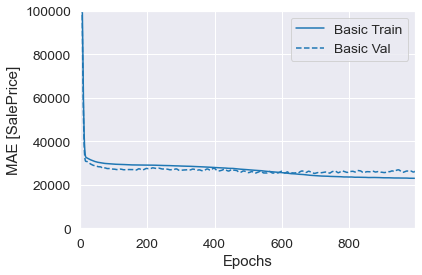

In [104]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [SalePrice]')

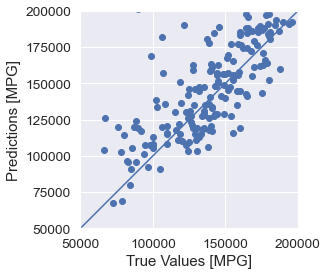

In [109]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [60000, 200000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [106]:
test_predictions

array([345273.2  , 145909.92 , 127761.01 , 296267.28 , 176653.33 ,
       226274.97 , 188211.06 , 151576.28 , 161118.02 , 119414.375,
       219380.   , 238714.84 , 282511.6  , 202827.12 , 150137.73 ,
       154722.95 , 161930.53 , 142804.78 , 169007.45 , 233928.9  ,
       196624.52 ,  96050.33 , 115149.336, 108068.47 , 152218.31 ,
       162492.28 , 107478.87 , 177410.28 , 153752.69 , 139777.67 ,
       225357.83 , 147824.03 , 192227.86 ,  90938.125, 130073.555,
       317797.3  , 169450.36 , 192598.97 , 208732.1  , 278572.22 ,
       232411.08 , 222992.53 , 166445.45 , 275871.5  , 356013.22 ,
       318628.9  , 176634.89 , 128756.85 , 133176.64 , 162795.97 ,
       231821.03 , 231604.72 , 216518.83 , 107494.055, 195800.22 ,
       222509.25 , 199085.48 , 259094.7  , 177552.27 , 103165.76 ,
       212854.92 , 117055.984, 177409.83 ,  95861.91 , 270103.5  ,
       135296.52 , 145706.27 , 238778.27 , 119196.586, 197487.27 ,
       127239.625, 270395.72 , 102770.875, 208026.1  , 241754.

In [108]:
test_labels

Id
12      345000
24      129900
25      154000
26      256300
29      207500
         ...  
1426    142000
1436    174000
1439    149700
1447    157900
1456    175000
Name: SalePrice, Length: 291, dtype: int64